# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set()

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
31894,id_1040,Munich,['Vegetarian Friendly'],1050.0,$$ - $$$,27.0,"[['Absolutely yummy elegance', 'Very creative ...",/Restaurant_Review-g187309-d7153029-Reviews-Pr...,d7153029,1,4.0
31779,id_2536,Rome,"['Italian', 'Cafe', 'Vegetarian Friendly', 'Ve...",2537.0,$,75.0,"[['So friendly!', 'Your Corner Cafe'], ['12/21...",/Restaurant_Review-g187791-d7722688-Reviews-Mo...,d7722688,1,4.5
42906,id_10084,London,"['Japanese', 'Sushi', 'Asian']",10093.0,$$ - $$$,101.0,"[['Delicious Japanese food', 'Good honest Japa...",/Restaurant_Review-g186338-d797226-Reviews-Haz...,d797226,1,3.5
40359,id_4050,Berlin,NaN,4052.0,NaN,2.0,"[['Good for breakfast'], ['12/01/2017']]",/Restaurant_Review-g187323-d12948857-Reviews-J...,d12948857,1,4.5
47493,id_5355,Madrid,"['Mediterranean', 'Spanish', 'European']",5358.0,$$ - $$$,122.0,"[['Great value for money', 'Paella low quality...",/Restaurant_Review-g187514-d3575211-Reviews-Ar...,d3575211,1,3.5


Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## Обработка признаков

Пройдемся по каждому признаку и приведем предварительную обработку. Посмотрим на пропуски и создадим новые признаки.

In [14]:
data.isna().sum()

Restaurant_id            0
City                     0
Cuisine Style        11590
Ranking                  0
Price Range          17361
Number of Reviews     3200
Reviews                  2
URL_TA                   0
ID_TA                    0
sample                   0
Rating                   0
dtype: int64

Cuisine Style, Price Range и Number of Reviews содержат много пропусков. Далее мы их заполним и создадим новые признаки, которые будут говорить об отсутствии информации.

### Restaurant_id

In [15]:
data.Restaurant_id.value_counts()

id_633      19
id_871      19
id_227      19
id_436      19
id_430      18
            ..
id_3907      1
id_11017     1
id_12357     1
id_13625     1
id_14894     1
Name: Restaurant_id, Length: 13094, dtype: int64

Мы видим что есть повторящиеся id, возможно эти рестораны сетевые. 

Создадим новый признак chain: 1 - сетевой, 0 - несетевой.

In [16]:
chain_lst = list(data.Restaurant_id.value_counts()[data.Restaurant_id.value_counts() > 1].index)

In [17]:
data['chain'] = data[data.Restaurant_id.isin(chain_lst)].Restaurant_id.apply(lambda x: 1)
data['chain'].fillna(0, inplace=True)

In [18]:
data['chain'].value_counts()

1.0    46193
0.0     3807
Name: chain, dtype: int64

### City

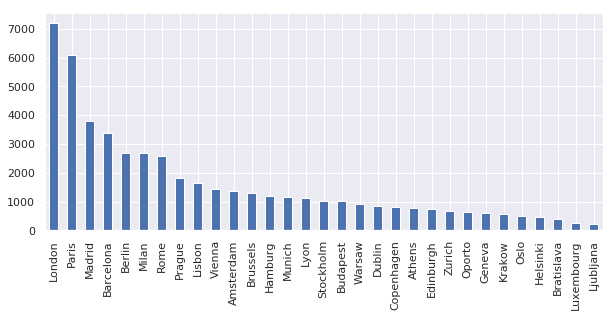

In [19]:
plt.figure(figsize=(10,4))
data.City.value_counts(ascending=False).plot(kind='bar');

Создадим признак количество ресторанов в городе.

In [20]:
city_counts_dict = dict(data['City'].value_counts())

In [21]:
data['rest_counts'] = data.City.map(city_counts_dict)

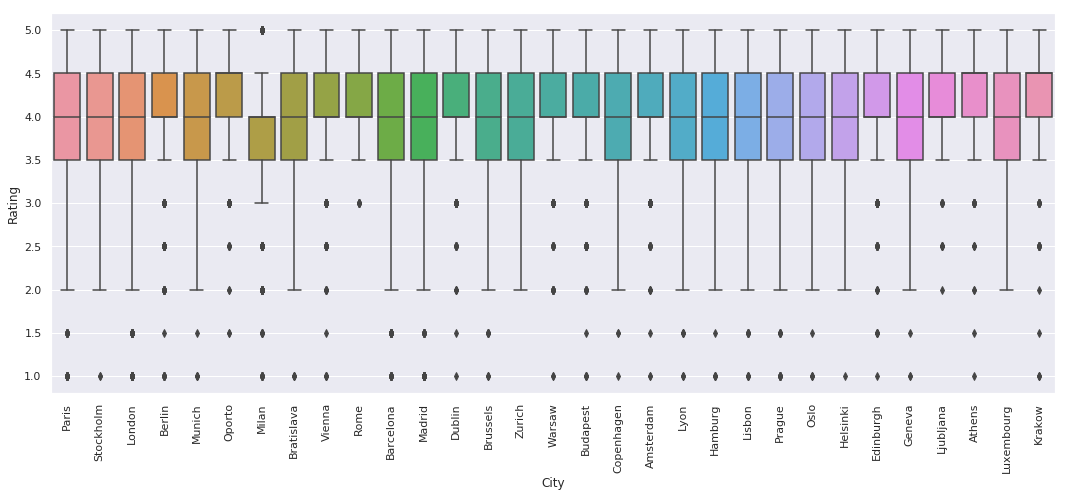

In [22]:
plt.figure(figsize=(18, 7))
sns.boxplot(x='City', y='Rating', data=data[data['sample'] == 1])
plt.xticks(rotation=90);

На графике можно увидеть, что рейтинг ресторанов в Rome начинаются с 3, а в Milan вероятность рейтинга с оценкой 5 очень мала. 

### Cuisine Style

In [23]:
data['Cuisine Style'][1]

"['European', 'Scandinavian', 'Gluten Free Options', 'Vegetarian Friendly', 'Vegan Options']"

Значения представлены в виде строки, обработаем их. Создадим список уникальных кухонь представленных во всем датасете. Пропуски заполним значением 'Other', создадим колонку, которая показывает было ли значение пустое.

In [24]:
data['Cuisine Style_NAN'] = data['Cuisine Style'].isna().astype('uint8')

In [25]:
data['Cuisine Style'].fillna("['Other']", inplace=True)

In [26]:
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: eval(x))

Создадим признак 'cuisine_count' - количество представленных кухонь в ресторане.

In [27]:
data['cuisine_count'] = data['Cuisine Style'].apply(lambda x: len(x))

Посмотрим частоту встречаемости кухонь и выберем редкие (< 50)

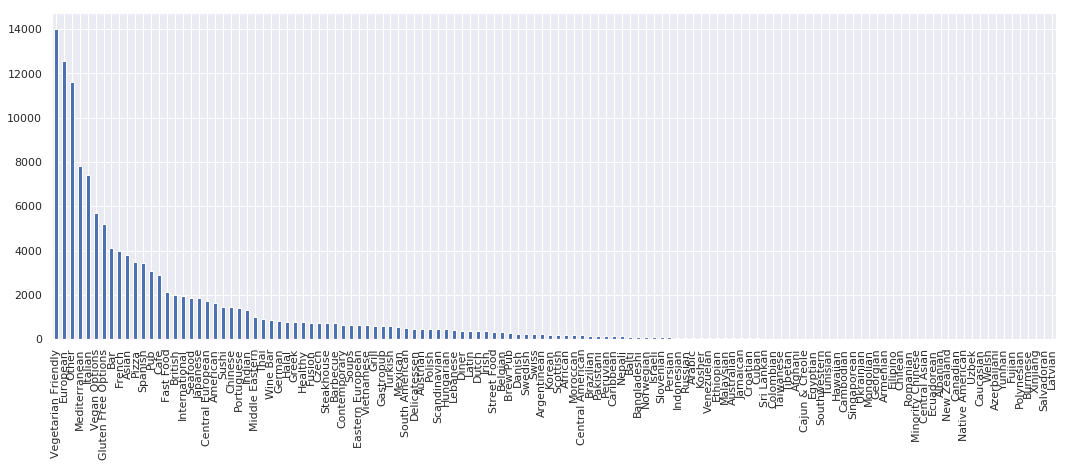

In [28]:
plt.figure(figsize=(18,6))
data.explode('Cuisine Style')['Cuisine Style'].value_counts(ascending=False).plot(kind='bar');

Vegetarian Friendly и European лидируют. Кухни, встречающиеся меньше 50 раз, будем считать редкими.

In [29]:
cuisine_rare_lst = data.explode('Cuisine Style')['Cuisine Style'].value_counts()[
    data.explode('Cuisine Style')['Cuisine Style'].value_counts() < 50].index.tolist()

In [30]:
def cuisine_rare_count(cell):
    '''Количество редких кухонь в ресторане'''
    x = 0
    for i in cuisine_rare_lst:
        if i in cell:
            x += 1
    return x

In [31]:
data['cuisine_rare'] = data['Cuisine Style'].apply(cuisine_rare_count)

Создадим dummy переменные кухонь

In [32]:
cuisine_lst = list(data.explode('Cuisine Style')['Cuisine Style'].unique())

In [33]:
def find_item(cell):
    if item in cell:
        return 1
    return 0
    
for item in cuisine_lst:
    data[item] = data['Cuisine Style'].apply(find_item)

### Ranking

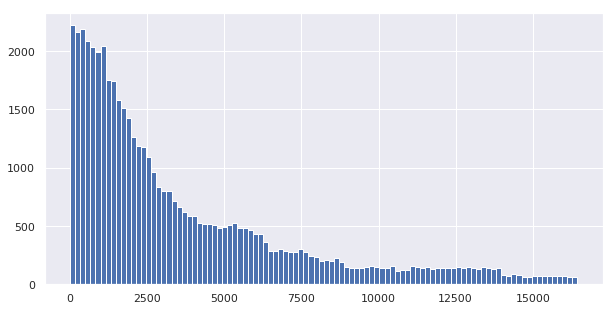

In [34]:
plt.rcParams['figure.figsize'] = (10,5)
data['Ranking'].hist(bins=100);

Посмотрим на топ 10 городов

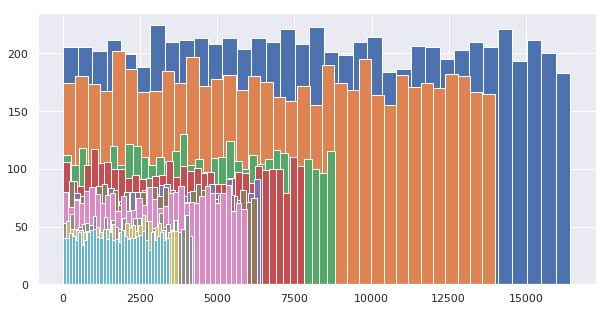

In [35]:
for x in (data['City'].value_counts())[0:10].index:
    data['Ranking'][data['City'] == x].hist(bins=35)

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за этого мы имеем смещение. Разделим Ranking на количество ресторанов в городе.

In [36]:
data['ranking_norm'] = data.Ranking / data.rest_counts

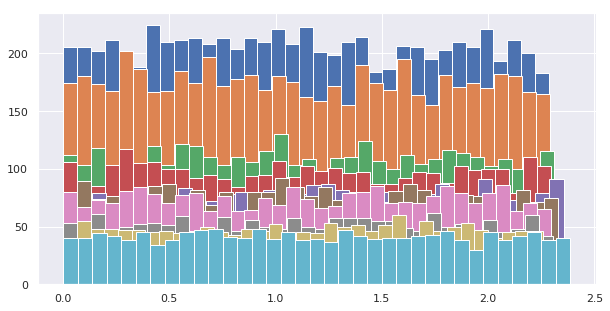

In [37]:
for x in (data['City'].value_counts())[0:10].index:
    data['ranking_norm'][data['City'] == x].hist(bins=35)

### Price Range

Заменим пропуски и изменим значения от 1 до 3. Создадим признак отсутствия информации.

In [38]:
data['Price Range'].value_counts(dropna=False)

$$ - $$$    23041
NaN         17361
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [39]:
data['Price Range_NAN'] = data['Price Range'].isna().astype('uint8')

In [40]:
city_lst = data.City.unique()
for city in city_lst:
    print(city,  data[data['City'] == city]['Price Range'].mode()[0])

Paris $$ - $$$
Helsinki $$ - $$$
Edinburgh $$ - $$$
London $$ - $$$
Bratislava $$ - $$$
Lisbon $$ - $$$
Budapest $$ - $$$
Stockholm $$ - $$$
Rome $$ - $$$
Milan $$ - $$$
Munich $$ - $$$
Hamburg $$ - $$$
Prague $$ - $$$
Vienna $$ - $$$
Dublin $$ - $$$
Barcelona $$ - $$$
Brussels $$ - $$$
Madrid $$ - $$$
Oslo $$ - $$$
Amsterdam $$ - $$$
Berlin $$ - $$$
Lyon $$ - $$$
Athens $$ - $$$
Warsaw $$ - $$$
Oporto $$ - $$$
Krakow $$ - $$$
Copenhagen $$ - $$$
Luxembourg $$ - $$$
Zurich $$ - $$$
Geneva $$ - $$$
Ljubljana $$ - $$$


Мода цен в ресторанах по городам одинаковая.

In [41]:
data['Price Range'].fillna(data['Price Range'].mode()[0], inplace=True)

In [42]:
price_dict = {'$': 1,
              '$$ - $$$': 2,
              '$$$$': 3}

In [43]:
data['Price Range'] = data['Price Range'].map(price_dict)

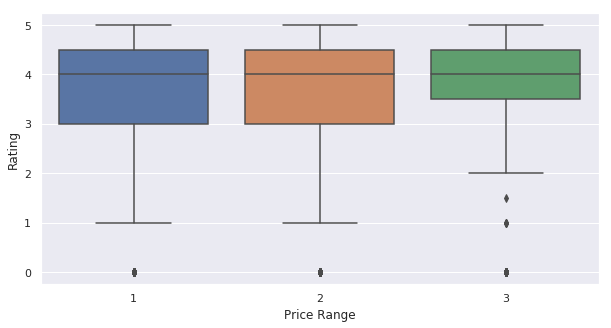

In [44]:
sns.boxplot(x='Price Range', y='Rating', data=data);

Самые дорогие рестораны реже получают низкие оценки.

### Reviews

In [45]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Значения признака представлены в виде строки, но есть четкая структура списков.

In [46]:
data['Reviews'] = data.Reviews.dropna().apply(
    lambda x: eval(x.replace('nan', '').replace('[,', "['',")))

In [47]:
data['Reviews'] = data['Reviews'].dropna().apply(
    lambda x: np.nan if len(x[0]) == 0 & len(x[1]) == 0 else x)

Создадим новые признаки, reviews, date_1, date_2

In [48]:
data['date'] = data['Reviews'].dropna().apply(lambda x: x[1])
data['date_1'] = data['date'].dropna().apply(lambda x: x[1] if len(x) == 2 else np.nan)
data['date_2'] = data['date'].dropna().apply(lambda x: x[0] if len(x) > 0 else np.nan)

In [49]:
data.drop('date', axis=1, inplace=True)

Заменим пропуски в date_1 и date_2 на min и max дату соответственно. Максимальная разница количества дней  между коментариями будет говорит о том, что отзывы практически не оставляют

In [50]:
data['date_1'] = pd.to_datetime(data['date_1'])
data['date_2'] = pd.to_datetime(data['date_2'])

In [51]:
data['date_1'].fillna(data['date_1'].min(), inplace=True)
data['date_2'].fillna(data['date_2'].max(), inplace=True)

Создадим признак разницы дней между последними двумя отзывами.

In [52]:
data['rewiew_days'] = abs(data['date_2'] - data['date_1']).dt.days

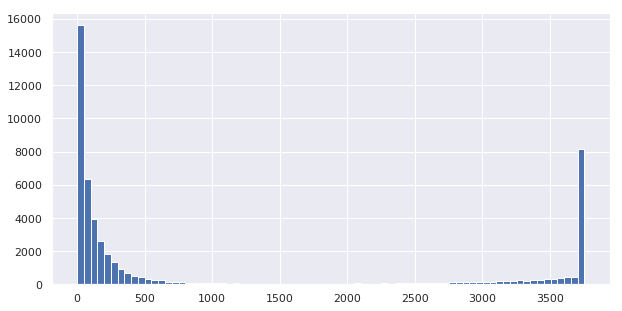

In [53]:
plt.figure(figsize=(10,5))
data['rewiew_days'].hist(bins=75);

In [54]:
data['days_to_today'] = (datetime.now() - data['date_2']).dt.days
data['days_to_today']

0        1260
1        1343
2        1320
3        1342
4        1278
         ... 
49995    1332
49996    1327
49997    1740
49998    1490
49999    2017
Name: days_to_today, Length: 50000, dtype: int64

Обработаем отзывы. Создадим признак количества последних коментариев (0-2)

In [55]:
data['Reviews'] = data['Reviews'].dropna().apply(lambda x: x[0])

In [56]:
data['last_rewiew_counts'] = data['Reviews'].dropna().apply(
    lambda x: 2 if len(x) == 2 else 1 if len(x) == 1 else 0)

In [57]:
data.last_rewiew_counts.fillna(0, inplace=True)

In [58]:
def len_rewiews(cell):
    x = 0
    for i in cell:
        x += len(i)
    return x

In [59]:
data['len_rewiews'] = data['Reviews'].dropna().apply(len_rewiews)
data['len_rewiews'].fillna(0, inplace=True)

### Number of Reviews

Посмотрим пропуски в колонке Number of Reviews

In [60]:
data[data['Number of Reviews'].isna()][['Number of Reviews', 'last_rewiew_counts']].head()

,Number of Reviews,last_rewiew_counts
7,NaN,0.0
25,NaN,0.0
53,NaN,0.0
74,NaN,1.0
81,NaN,0.0


In [61]:
data['Number of Reviews'].isna().sum()

3200

In [62]:
data.loc[(data['last_rewiew_counts'] == 0) & (
    data['Number of Reviews'].isna()), 'Number of Reviews'] = 0
data.loc[(data['last_rewiew_counts'] == 1) & (
    data['Number of Reviews'].isna()), 'Number of Reviews'] = 1

In [63]:
data['Number of Reviews'].isna().sum()

0

In [64]:
data[data['last_rewiew_counts'] ==0][['Number of Reviews', 'last_rewiew_counts']].head()

,Number of Reviews,last_rewiew_counts
0,4.0,0.0
6,2.0,0.0
7,0.0,0.0
18,2.0,0.0
20,8.0,0.0


У нас есть значения последних отзывов равные 0, хотя общее количество отзывов > 0. Это значит, что отзывы оставляли пустые.

Создадим словарь количество отзывов по городам и подставим в датасет

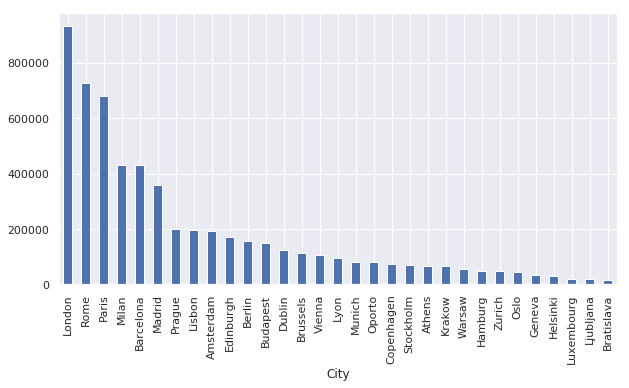

In [65]:
data.groupby('City')['Number of Reviews'].sum().sort_values(ascending=False).plot(kind='bar');

In [66]:
rewiews_city_dict = dict(data.groupby('City')['Number of Reviews'].sum())

In [67]:
data['num_rewiews_city'] = data.City.map(rewiews_city_dict)

Создадим признак отношения рейтинга в городе к количеству отзывов в городе.

In [68]:
data['relative_rank_reviews'] = data['Ranking'] / data['num_rewiews_city']

### URL_TA 

In [69]:
data['URL_TA'][0]

'/Restaurant_Review-g187147-d10746918-Reviews-Le_Perchoir-Paris_Ile_de_France.html'

In [70]:
data.drop(['URL_TA'], axis=1, inplace=True)

### ID_TA

In [71]:
data['ID_TA'] = data['ID_TA'].apply(lambda x: int(x[1:]))

### Dummy

In [72]:
data = pd.get_dummies(data, columns=['City'])

### Удалим все нечисловые признаки и признаки, которые ухудшали модель.

In [73]:
data = data.select_dtypes(exclude='O').drop(['date_1', 'date_2',
                                             'len_rewiews',
                                             'Ranking',
                                             'chain','last_rewiew_counts'], axis=1)

In [74]:
data.head()

,Price Range,Number of Reviews,ID_TA,sample,Rating,rest_counts,Cuisine Style_NAN,cuisine_count,cuisine_rare,Bar,...,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
0,2,4.0,10746918,0,0.0,6108,0,2,0,1,...,0,0,0,1,0,0,0,0,0,0
1,2,97.0,6674944,0,0.0,475,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,28.0,13129638,0,0.0,745,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,202.0,680417,0,0.0,7193,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,162.0,1112354,0,0.0,380,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0


### Посмотрим распределение целевой переменной

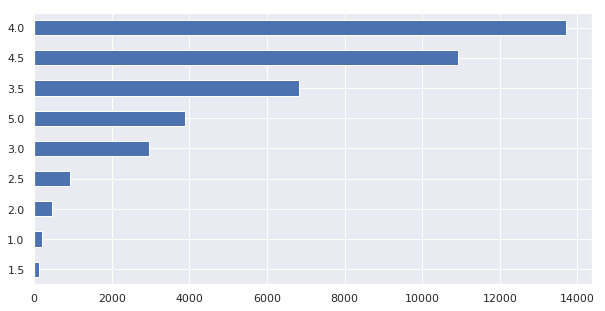

In [75]:
plt.figure(figsize=(10, 5))
df_train['Rating'].value_counts(ascending=True).plot(kind='barh');

### Посмотрим распределение целевой переменной относительно признака ranking_norm

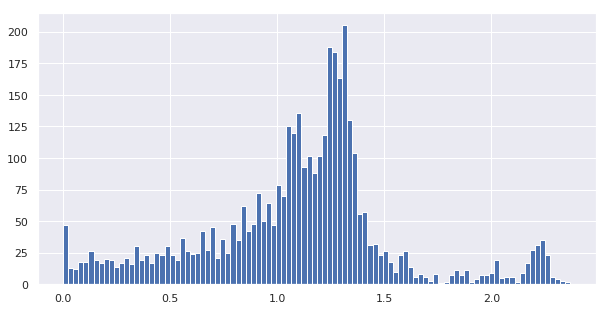

In [76]:
plt.figure(figsize=(10, 5))
data['ranking_norm'][data['Rating'] == 5].hist(bins=100);

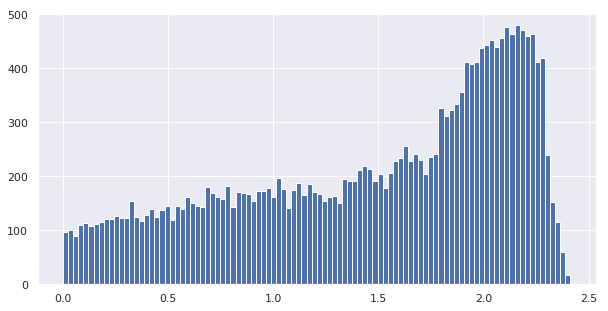

In [77]:
plt.figure(figsize=(10, 5))
data['ranking_norm'][data['Rating'] < 4].hist(bins=100);

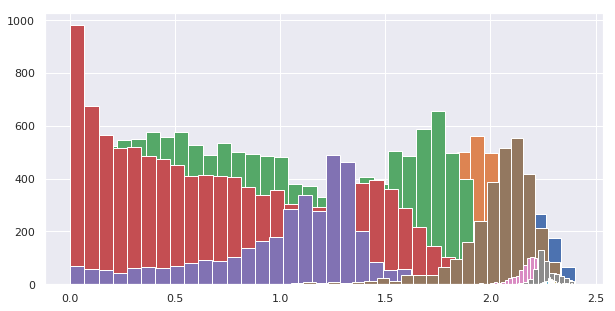

In [78]:
for x in data.Rating.unique():
    data['ranking_norm'][data['Rating'] == x].hist(bins=35)

## Корреляция признаков

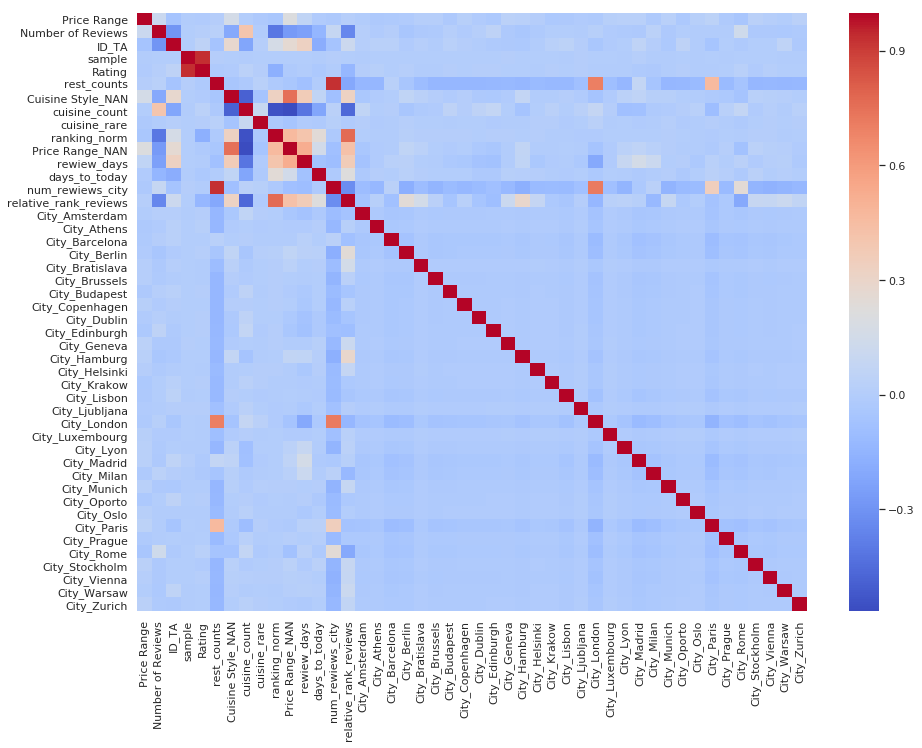

In [79]:
plt.rcParams['figure.figsize'] = (15,11)
sns.heatmap(data.drop(cuisine_lst, axis=1).corr(), cmap='coolwarm');

In [80]:
data.drop(cuisine_lst, axis=1).corr().Rating.sort_values(ascending=False).to_frame()

,Rating
Rating,1.000000
sample,0.936543
ID_TA,0.049589
cuisine_count,0.034506
City_Rome,0.027527
City_Athens,0.016852
City_Berlin,0.012834
Number of Reviews,0.011011
City_Vienna,0.010188
City_Oporto,0.009654


Теперь выделим тестовую часть

In [81]:
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем, как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации.**

In [82]:
# Воспользуемся специальной функцией train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [83]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 171), (40000, 171), (40000, 170), (32000, 170), (8000, 170))

# Model 
Сам ML

In [84]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [85]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [86]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

# # Округлим предсказанные значения до степени округления целевой переменной
# np.round(y_pred*2)/2

def round_of_rating(number):
    return np.round(number * 2) / 2

y_pred_old = y_pred.copy()
y_pred = round_of_rating(y_pred) 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [87]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1615625


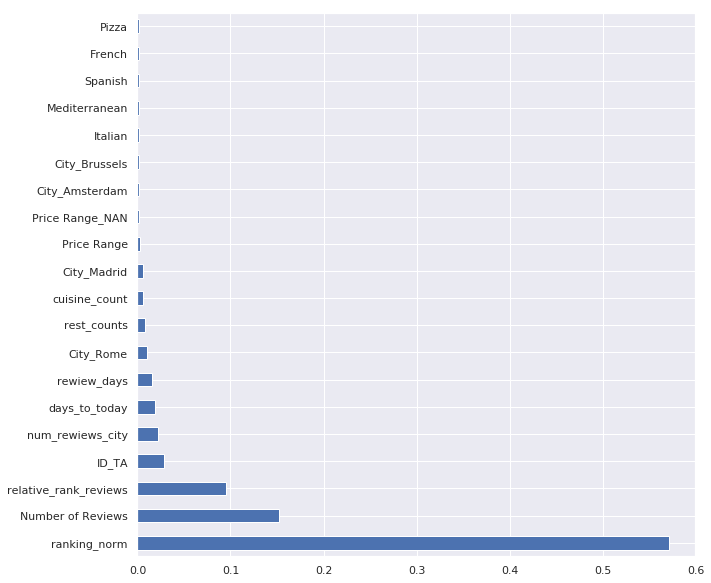

In [88]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на kaggle

In [89]:
test_data.sample(10)

,Price Range,Number of Reviews,ID_TA,Rating,rest_counts,Cuisine Style_NAN,cuisine_count,cuisine_rare,Bar,Pub,...,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
9619,1,9.0,7784949,0.0,6108,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2020,2,0.0,13298310,0.0,6108,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9878,2,36.0,6627759,0.0,819,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1756,3,157.0,947562,0.0,6108,0,3,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3252,2,9.0,4767612,0.0,1816,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2121,2,7.0,12238866,0.0,2589,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5932,2,10.0,8788146,0.0,554,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
967,2,3.0,7011418,0.0,2589,0,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2838,1,784.0,5883980,0.0,6108,0,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
167,2,13.0,6016792,0.0,2694,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
test_data = test_data.drop(['Rating'], axis=1)

In [91]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [92]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [93]:
for i in range(predict_submission.size):
        predict_submission[i]=round_of_rating(predict_submission[i])

In [94]:
predict_submission

array([3. , 4. , 4.5, ..., 3. , 4.5, 4.5])

In [95]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.0
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,2.5
7,id_7,2.5
8,id_8,4.0
9,id_9,4.5
